In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import DataLoader

In [13]:
import skimage.io as skio

two data primitives:
1. torch.utils.data.DataLoader - wraps an iterable around Dataset to enable easy access to samples
2. torch.utils.data.Dataset - stores samples and corresponding labels

Image datasets to prototype models can be found https://pytorch.org/vision/stable/datasets.html

In [4]:
training_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

In [11]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

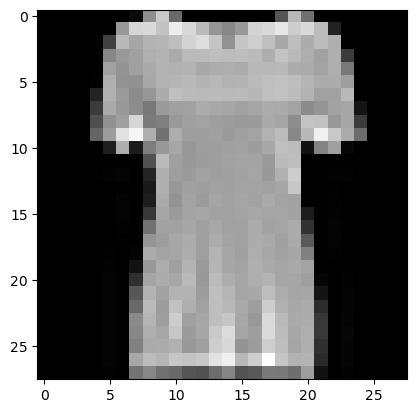

In [24]:
plt.imshow(training_data[10][0].squeeze(), cmap='gray')

In this section we create a custom Dataset class for my files. it needs to have three functions __init__, __len__, __getitem__ 

In [48]:
# ## Creating a dataset for manual loading 
# key = []
# for i in range(100):
#     img = training_data[i][0].numpy()
#     label = labels_map[training_data[i][1]]
#     img_path = './data/iterable_FashionMNIST/img_{}.tif'.format(i)
#     skio.imsave(img_path, img)
#     key.append(
#         {
#         'img_path': img_path,
#         'label': label,
#         }
#     )
# pd.DataFrame(key).to_csv('./data/annotations_file.csv', index=False)

In [52]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = self.img_labels.iloc[idx,0]
        image = torch.tensor(skio.imread(img_path))
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [65]:
custom_data = CustomImageDataset(
    annotations_file='./data/annotations_file.csv', 
    img_dir='./data/iterable_FashionMNIST/'
)

Text(0.5, 1.0, 'T-Shirt')

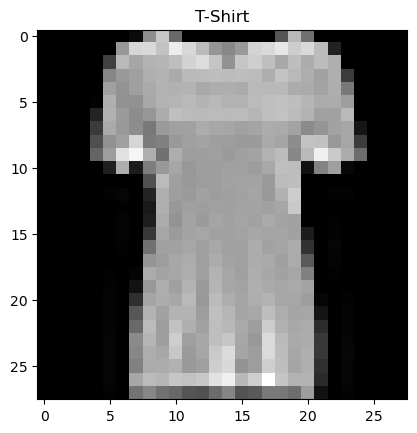

In [66]:
plt.imshow(custom_data[10][0].squeeze(), cmap='gray')
plt.title(custom_data[10][1])

The following dataloaders let us iterate through the training and test data

In [81]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)
custom_dataloader = DataLoader(custom_data, batch_size=100, shuffle=True)

Text(0.5, 1.0, 'Sandal')

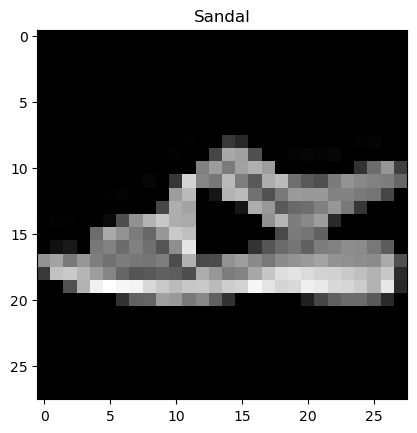

In [86]:
train_features, train_labels = next(iter(custom_dataloader))
plt.imshow(train_features[0].squeeze(), cmap='gray')
plt.title(train_labels[0])